In [52]:
import pandas as pd

In [53]:
data=pd.read_csv('2024.csv')

In [54]:
data.columns

Index(['Country name', 'Ladder score', 'upperwhisker', 'lowerwhisker',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [55]:
data.describe()

,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,143.000000,143.000000,143.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,5.527580,5.641175,5.413972,1.378807,1.134329,0.520886,0.620621,0.146271,0.154121,1.575914
std,1.170717,1.155008,1.187133,0.425098,0.333317,0.164923,0.162492,0.073441,0.126238,0.537459
min,1.721000,1.775000,1.667000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.073000
25%,4.726000,4.845500,4.606000,1.077750,0.921750,0.398000,0.527500,0.091000,0.068750,1.308250
50%,5.785000,5.895000,5.674000,1.431500,1.237500,0.549500,0.641000,0.136500,0.120500,1.644500
75%,6.416000,6.507500,6.319000,1.741500,1.383250,0.648500,0.736000,0.192500,0.193750,1.881750
max,7.741000,7.815000,7.667000,2.141000,1.617000,0.857000,0.863000,0.401000,0.575000,2.998000


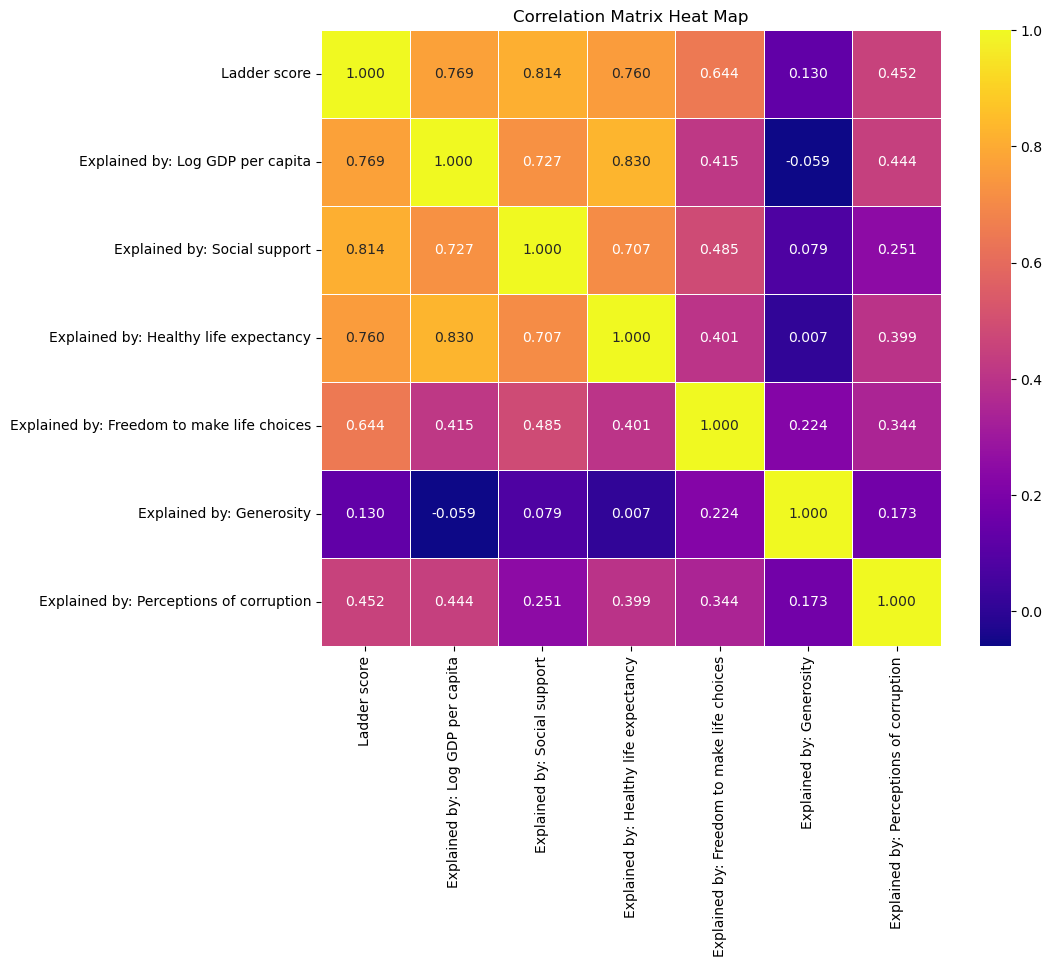

In [57]:
import matplotlib.pyplot as plt # Import missing module
import seaborn as sns # Also import Seaborn
import numpy as np # Let's add NumPy (can be used for mask)

# Define columns for Correlation Analysis
columns = ['Ladder score',
'Explained by: Log GDP per capita',
'Explained by: Social support',
'Explained by: Healthy life expectancy',
'Explained by: Freedom to make life choices',
'Explained by: Generosity',
'Explained by: Perceptions of corruption']

# Create the correlation matrix
correlation_matrix = data[columns].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="plasma", fmt=".3f", linewidths=0.5)
plt.title("Correlation Matrix Heat Map")
plt.show()

In [43]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("2024.csv")

# Set column "Country name" as index
data.set_index("Country name", inplace=True)

# Select variables to use for clustering
X = data.iloc[:, 1:]  # Get all columns except the first column (Country name)

# Fill missing values with column averages
X.fillna(X.mean(), inplace=True)

# Create K-means clustering model
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit the model to the data
kmeans.fit(X)

C:\Users\ÇELİK\AppData\Local\Temp\ipykernel_23144\408500193.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)
C:\Users\ÇELİK\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [44]:
# Get cluster labels
clusters = kmeans.labels_

# Add the extracted cluster labels to the DataFrame based on the number of clusters
data['Cluster'] = clusters

# Show cluster centers
print("Küme Merkezleri:")
print(kmeans.cluster_centers_)

# Show groups by cluster number
print("\nKüme Sayısı ve Üye Sayıları:")
print(data['Cluster'].value_counts())

Küme Merkezleri:
[[6.03702    5.81424    1.47205614 1.30392657 0.58529771 0.64717243
  0.13290543 0.10266243 1.67311829]
 [3.61278947 3.34226316 0.96778947 0.73221053 0.34926316 0.48242105
  0.12073684 0.12105263 0.704     ]
 [6.96308333 6.78822222 1.81502778 1.40741667 0.66316667 0.74141667
  0.16655556 0.28938889 1.79269444]
 [4.88218421 4.62123684 1.04835827 0.85351729 0.38715188 0.5403485
  0.15740902 0.11021692 1.67860075]]

Küme Sayısı ve Üye Sayıları:
Cluster
0    50
3    38
2    36
1    19
Name: count, dtype: int64


C:\Users\ÇELİK\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ÇELİK\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ÇELİK\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ÇELİK\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_

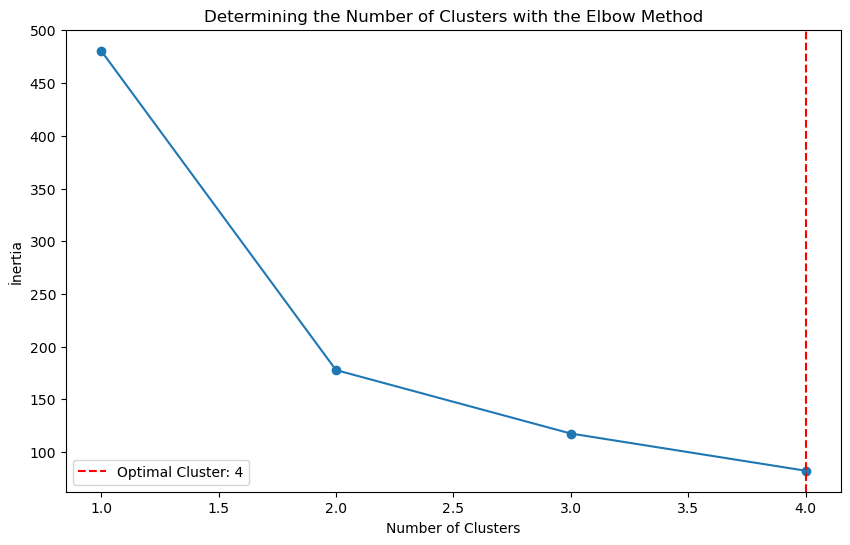

In [45]:
# Determining the most appropriate number of clusters with the Elbow method
sse = []
for k in range(1, 5):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Graph for determining the most appropriate number of clusters according to the point where the elbow is formed
plt.figure(figsize=(10, 6))
plt.plot(range(1, 5), sse, marker='o')
plt.title('Determining the Number of Clusters with the Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('İnertia')

# Estimate and highlight the most suitable number of clusters
optimal_k = range(1, 5)[sse.index(min(sse, key=lambda x: abs(x - min(sse))))]
plt.axvline(optimal_k, color='r', linestyle='--', label=f'Optimal Cluster: {optimal_k}')
plt.legend()
plt.show()

C:\Users\ÇELİK\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster Centers:
[[6.03702    5.81424    1.47205614 1.30392657 0.58529771 0.64717243
  0.13290543 0.10266243 1.67311829]
 [3.61278947 3.34226316 0.96778947 0.73221053 0.34926316 0.48242105
  0.12073684 0.12105263 0.704     ]
 [6.96308333 6.78822222 1.81502778 1.40741667 0.66316667 0.74141667
  0.16655556 0.28938889 1.79269444]
 [4.88218421 4.62123684 1.04835827 0.85351729 0.38715188 0.5403485
  0.15740902 0.11021692 1.67860075]]

Number of Clusters and Number of Members:
Cluster
0    50
3    38
2    36
1    19
Name: count, dtype: int64


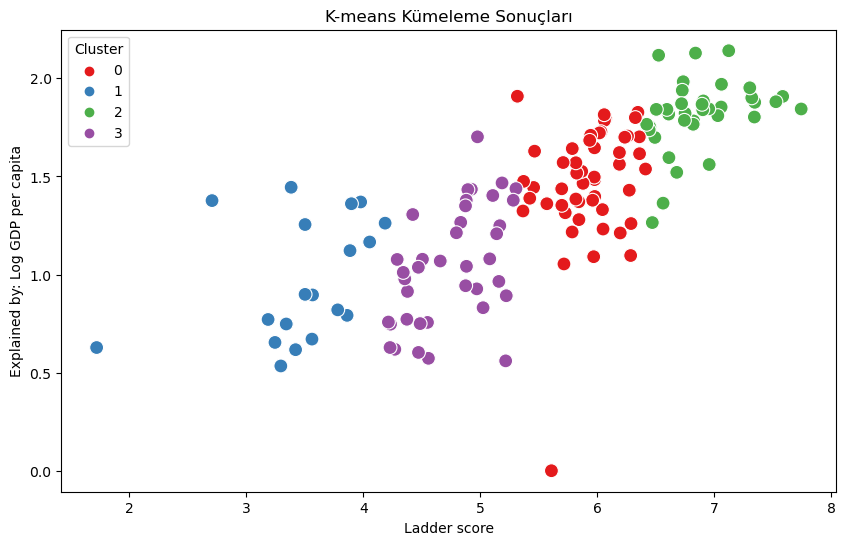

In [46]:
# Create K-means clustering model
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit the model to the data
kmeans.fit(X)

# Get cluster labels
clusters = kmeans.labels_

# Add the extracted cluster labels to the DataFrame based on the number of clusters
data['Cluster'] = clusters

# Show cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)

# Show groups by cluster number
print("\nNumber of Clusters and Number of Members:")
print(data['Cluster'].value_counts())

# Visualize clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Ladder score', y='Explained by: Log GDP per capita', hue='Cluster', palette='Set1', s=100)
plt.title('K-means Kümeleme Sonuçları')
plt.xlabel('Ladder score')
plt.ylabel('Explained by: Log GDP per capita')
plt.legend(title='Cluster')
plt.show()

C:\Users\ÇELİK\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


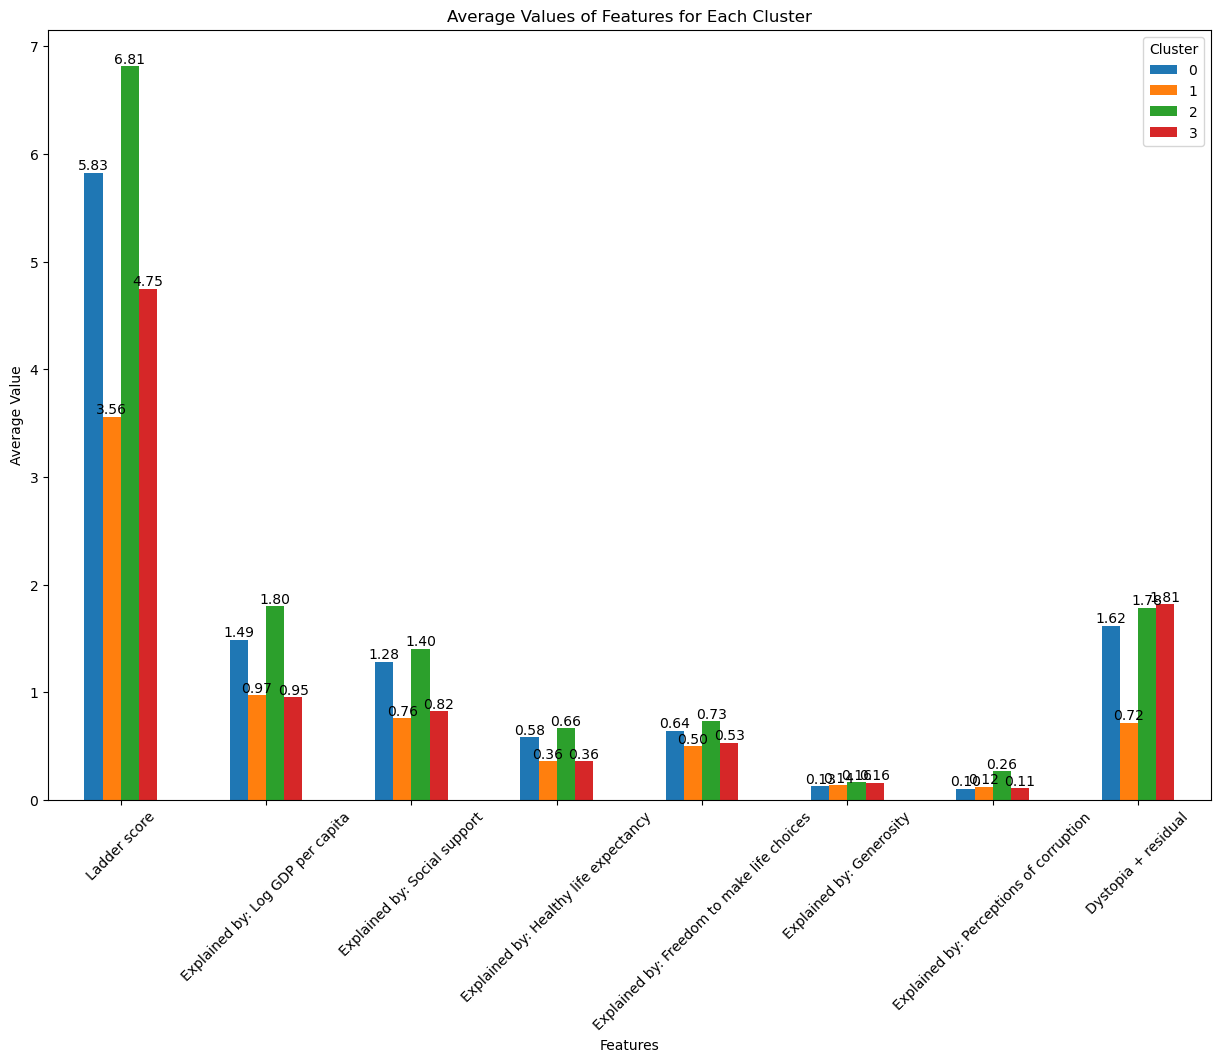

In [47]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('2024.csv')

# Set 'Country name' as the index
data.set_index("Country name", inplace=True)

# Remove the 'upperwhisker' and 'lowerwhisker' columns from the dataset
X = data.drop(['upperwhisker', 'lowerwhisker'], axis=1)

# Fill missing values with column means
X.fillna(X.mean(), inplace=True)

# Create and fit the KMeans clustering model
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

# Calculate the mean values for each feature in each cluster, excluding the removed columns
cluster_means = data.drop(['upperwhisker', 'lowerwhisker'], axis=1).groupby('Cluster').mean()

# Plot the average values of features in each cluster with a bar chart and label each bar with its value
fig, ax = plt.subplots(figsize=(15, 10))
bars = cluster_means.T.plot(kind='bar', ax=ax)

# Add labels on each bar
for container in bars.containers:
    bars.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10)

# Set the title and labels
plt.title('Average Values of Features for Each Cluster')
plt.xlabel('Features')
plt.ylabel('Average Value')
plt.legend(title='Cluster')

# Fix the rotation issue
plt.xticks(rotation=45)  # Rotate the X-axis labels by 45 degrees

plt.show()


In [48]:
cluster_means

,Ladder score,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
Cluster,,,,,,,,
0,5.825458,1.485826,1.280565,0.581043,0.641696,0.125457,0.104630,1.615261
1,3.560381,0.970333,0.758048,0.357810,0.499000,0.136429,0.121190,0.717571
2,6.812780,1.800585,1.404659,0.663220,0.730854,0.164341,0.264293,1.784805
3,4.749394,0.952625,0.824688,0.359063,0.528906,0.159500,0.105719,1.815000


C:\Users\ÇELİK\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ÇELİK\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ÇELİK\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ÇELİK\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_

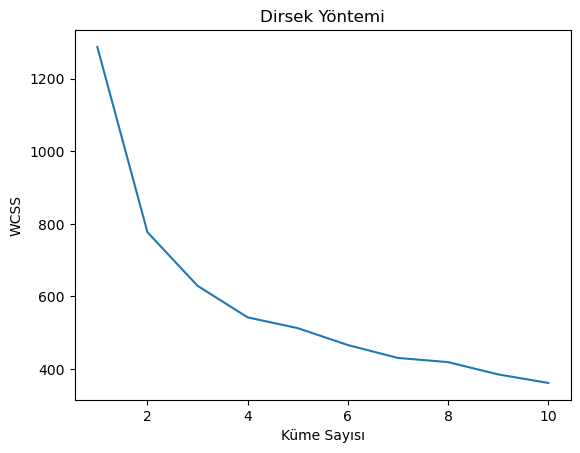

C:\Users\ÇELİK\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


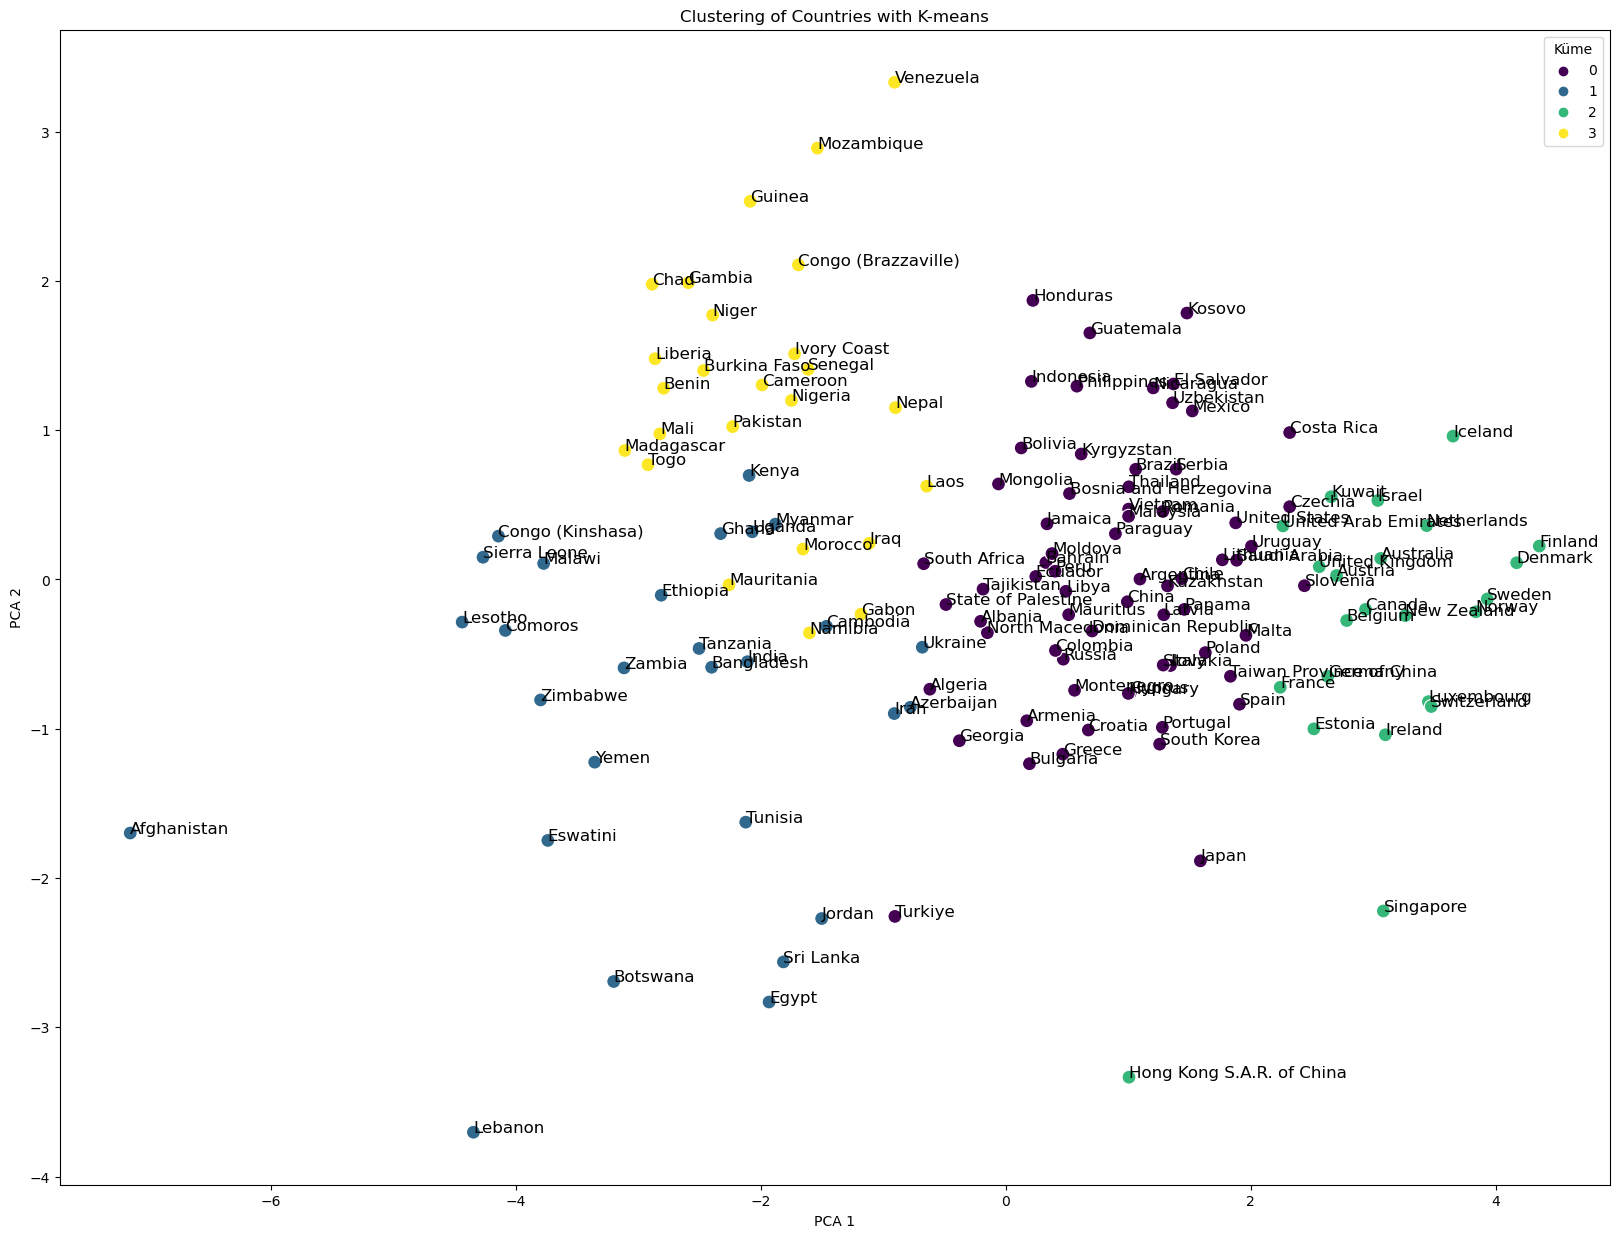

Küme 0:
 ['Costa Rica' 'Czechia' 'Lithuania' 'Slovenia' 'United States' 'Mexico'
 'Uruguay' 'Saudi Arabia' 'Kosovo' 'Taiwan Province of China' 'Romania'
 'El Salvador' 'Poland' 'Spain' 'Serbia' 'Chile' 'Panama' 'Malta' 'Italy'
 'Guatemala' 'Nicaragua' 'Brazil' 'Slovakia' 'Latvia' 'Uzbekistan'
 'Argentina' 'Kazakhstan' 'Cyprus' 'Japan' 'South Korea' 'Philippines'
 'Vietnam' 'Portugal' 'Hungary' 'Paraguay' 'Thailand' 'Malaysia' 'China'
 'Honduras' 'Bahrain' 'Croatia' 'Greece' 'Bosnia and Herzegovina' 'Libya'
 'Jamaica' 'Peru' 'Dominican Republic' 'Mauritius' 'Moldova' 'Russia'
 'Bolivia' 'Ecuador' 'Kyrgyzstan' 'Montenegro' 'Mongolia' 'Colombia'
 'Indonesia' 'Bulgaria' 'Armenia' 'South Africa' 'North Macedonia'
 'Algeria' 'Albania' 'Tajikistan' 'Georgia' 'Turkiye' 'State of Palestine']
Küme 1:
 ['Iran' 'Azerbaijan' 'Ukraine' 'Kenya' 'Tunisia' 'Uganda' 'Myanmar'
 'Cambodia' 'Ghana' 'Jordan' 'India' 'Egypt' 'Sri Lanka' 'Bangladesh'
 'Ethiopia' 'Tanzania' 'Comoros' 'Yemen' 'Zambia' 'Eswatini

In [49]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('2024.csv')

# Separate properties and target variables
X = df.drop(columns=['Country name', 'Ladder score'])
y = df['Ladder score']

# Fill missing values with average
X_imputed = pd.DataFrame(SimpleImputer(strategy='mean').fit_transform(X), columns=X.columns)

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Determine the appropriate number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Dirsek Yöntemi')
plt.xlabel('Küme Sayısı')
plt.ylabel('WCSS')
plt.show()

# K-means clustering (e.g. with 4 clusters)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Reduction to two dimensions with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Data Visualization
plt.figure(figsize=(20, 15))
scatter = sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis', s=100)
plt.title('Clustering of Countries with K-means')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

# Add clusters to original dataframe
df['Cluster'] = clusters

# Label each data point
for i in range(len(X_pca)):
    plt.text(X_pca[i, 0], X_pca[i, 1], df['Country name'].iloc[i], fontsize=12)

plt.legend(title='Küme')
plt.show()

# Print the countries in each set
for cluster in range(kmeans.n_clusters):
    print(f"Küme {cluster}:\n", df[df['Cluster'] == cluster]['Country name'].values)

C:\Users\ÇELİK\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


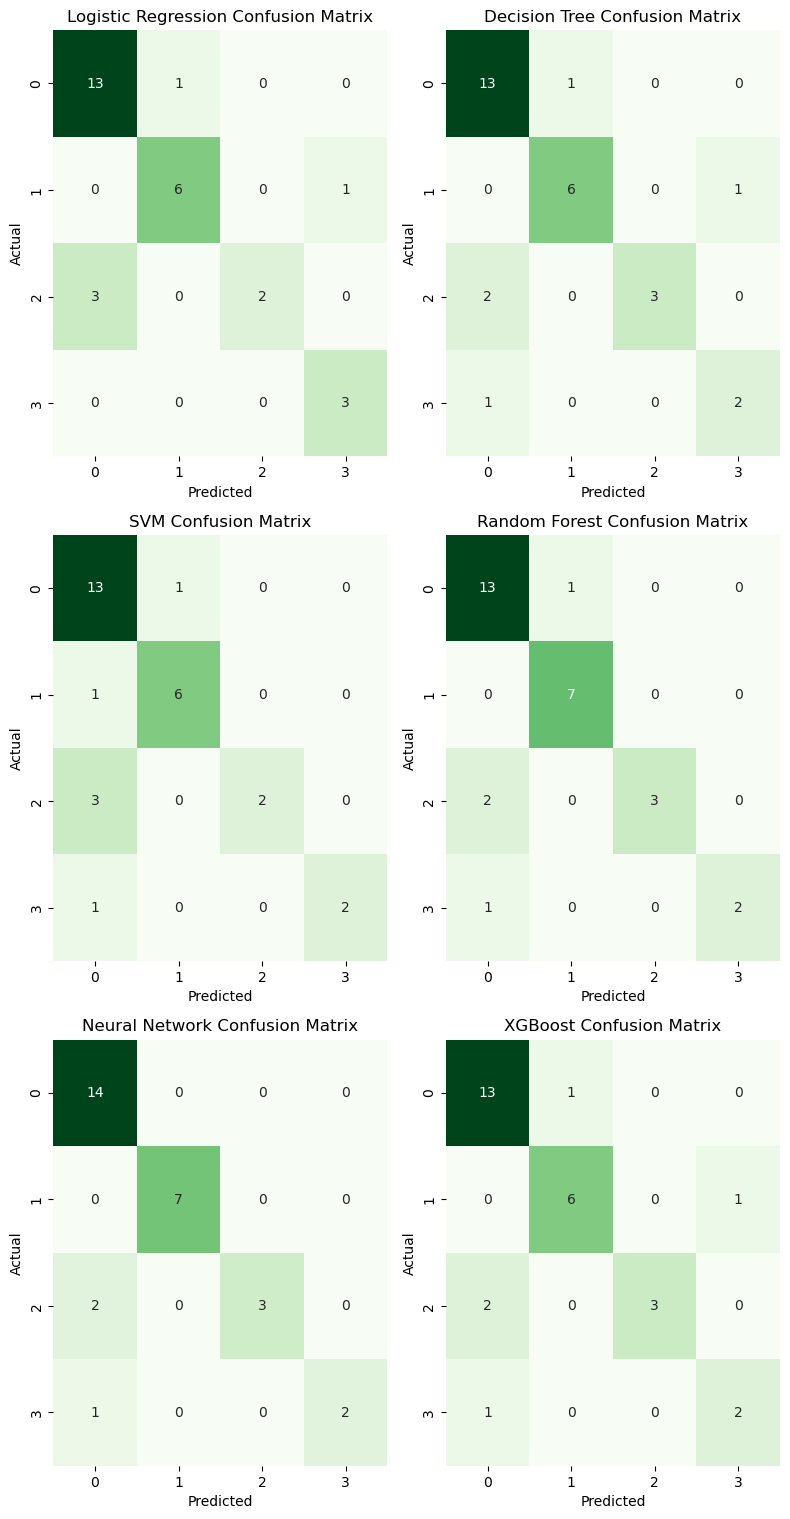

Logistic Regression Accuracy: 0.8275862068965517
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.93      0.87        14
           1       0.86      0.86      0.86         7
           2       1.00      0.40      0.57         5
           3       0.75      1.00      0.86         3

    accuracy                           0.83        29
   macro avg       0.85      0.80      0.79        29
weighted avg       0.85      0.83      0.81        29

Decision Tree Accuracy: 0.8275862068965517
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.93      0.87        14
           1       0.86      0.86      0.86         7
           2       1.00      0.60      0.75         5
           3       0.67      0.67      0.67         3

    accuracy                           0.83        29
   macro avg       0.83      0.76      0.79        29
weighted av

In [50]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier

# Load the dataset
df = pd.read_csv('2024.csv')

# Separate properties and target variables
X = df.drop(columns=['Country name', 'Ladder score'])
y = df['Ladder score']

# Fill missing values ​​with average
X_imputed = pd.DataFrame(SimpleImputer(strategy='mean').fit_transform(X), columns=X.columns)

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# K-means clustering to use clusters as target variables
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
y_clusters = kmeans.fit_predict(X_scaled)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_clusters, test_size=0.2, random_state=42)

# Define models
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
decision_tree_model = DecisionTreeClassifier(random_state=42)
svm_model = SVC(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)
neural_network_model = MLPClassifier(max_iter=1000, random_state=42)
xgboost_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Train models
logistic_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
neural_network_model.fit(X_train, y_train)
xgboost_model.fit(X_train, y_train)

# Make predictions
y_pred_logistic = logistic_model.predict(X_test)
y_pred_decision_tree = decision_tree_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)
y_pred_random_forest = random_forest_model.predict(X_test)
y_pred_neural_network = neural_network_model.predict(X_test)
y_pred_xgboost = xgboost_model.predict(X_test)

# Draw Confusion Matrix for each model
models = {
    "Logistic Regression": y_pred_logistic,
    "Decision Tree": y_pred_decision_tree,
    "SVM": y_pred_svm,
    "Random Forest": y_pred_random_forest,
    "Neural Network": y_pred_neural_network,
    "XGBoost": y_pred_xgboost
}

# Plot Confusion Matrices in a single column
plt.figure(figsize=(8, 30))
for i, (model_name, y_pred) in enumerate(models.items(), 1):
    plt.subplot(len(models), 2, i)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False)
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()

# Print the accuracy of each model on the screen
for model_name, y_pred in models.items():
    print(f"{model_name} Accuracy:", accuracy_score(y_test, y_pred))
    print(f"{model_name} Classification Report:\n", classification_report(y_test, y_pred))

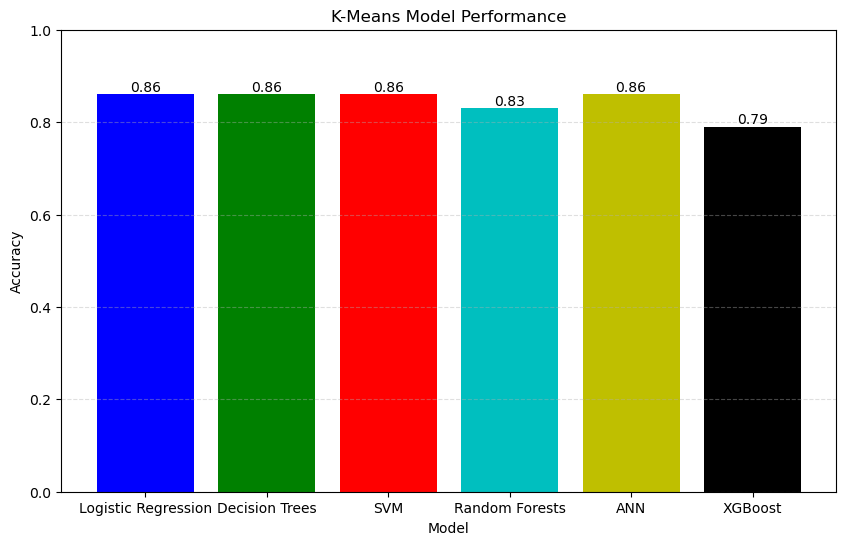

In [51]:
import matplotlib.pyplot as plt

# Model names and accuracy values
models = ["Logistic Regression", "Decision Trees", "SVM", "Random Forests", "ANN", "XGBoost"]
accuracies = [0.86, 0.86, 0.86, 0.83, 0.86, 0.79]

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=["b", "g", "r", "c", "y", "k"])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("K-Means Model Performance")
plt.ylim(0, 1)  # Y-axis limits
plt.grid(axis="y", linestyle="--", alpha=0.4)

# # Label numeric values
for i, acc in enumerate(accuracies):
    plt.text(i, acc, str(acc), ha='center', va='bottom')

plt.show()